<a href="https://colab.research.google.com/github/Farmhouse121/Financial-Data-Science-in-Python/blob/main/Miscellaneous/Longer_Term_Crypto_Degrees_of_Freedom.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from my_library import *

16:44:14 Starting...
16:44:14 Installing yfinance into Google notebook...
16:44:27 Installing arch into Google notebook...
16:44:52 Initialized.


In [2]:
data=pd.read_table('https://s3.amazonaws.com/public.gillerinvestments.com/crypto_returns.txt',header=[0, 1],skiprows=[2],sep='\\s+',engine='python',parse_dates=True)
data.columns=data.columns.droplevel(1)
data.index=pd.DatetimeIndex(data.index).to_period('D')
data.index.name='UTC Date'
data.columns.name='Return (%)'
data=data[sorted(data.columns)].copy()
data.drop(data.index[-1],inplace=True) # remove the final row in case it is not complete
display(data)

Return (%),AAVE-USD,AVAX-USD,BCH-USD,BTC-USD,COMP-USD,DOGE-USD,ETC-USD,ETH-USD,LINK-USD,LTC-USD,SHIB-USD,UNI-USD,XLM-USD,XTZ-USD
UTC Date,,,,,,,,,,,,,,
2024-07-31,2.001567,-2.358840,-4.200110,-2.365537,-0.047707,-2.837462,-2.073961,-1.452662,-2.375695,-2.164731,-6.382353,-3.024153,-1.936113,-2.775783
2024-08-01,8.726297,0.036957,-0.288448,1.151609,1.518046,-2.302137,-0.996922,-0.871557,0.491381,-0.799247,-0.816839,0.230222,-1.248259,-0.608589
2024-08-02,-5.610969,-8.265604,-7.564218,-6.025579,-4.053610,-6.341034,-6.167053,-6.727354,-7.544241,-6.546150,-7.190371,-8.025336,-3.852546,-5.256278
2024-08-03,-4.481945,-3.931834,-4.592054,-1.198185,-13.779336,-3.094934,-2.771871,-2.837828,-1.918234,-0.578258,-2.866894,0.234600,-2.236539,-0.486530
2024-08-04,-7.831497,-6.321154,-8.886479,-4.229510,-7.939911,-4.046256,-3.804583,-7.507444,-6.932854,-3.440406,-6.289529,-7.255568,-5.467211,-3.531816
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-11-15,4.340019,6.178983,4.272462,4.187487,6.014859,5.414589,5.742999,1.410048,6.752333,2.248886,9.028375,5.451430,12.557544,6.405011
2024-11-16,2.273263,6.363144,6.911346,-0.554400,7.375736,-4.304549,15.495826,1.048830,4.725412,13.288260,-3.253155,5.385134,48.724248,17.184555
2024-11-17,-3.835313,-1.191683,-6.372482,-0.705009,-1.248916,1.148373,-3.567966,-1.797951,-4.961334,-8.183810,0.896678,-3.695750,-9.048189,-9.682839


Return (%),AAVE-USD,AVAX-USD,BCH-USD,BTC-USD,COMP-USD,DOGE-USD,ETC-USD,ETH-USD,LINK-USD,LTC-USD,SHIB-USD,UNI-USD,XLM-USD,XTZ-USD
Return (%),,,,,,,,,,,,,,
AAVE-USD,1.000000,0.615917,0.569416,0.530108,0.688979,0.358315,0.593659,0.652116,0.576677,0.413234,0.408843,0.704123,0.186582,0.413578
AVAX-USD,0.615917,1.000000,0.736734,0.797332,0.791402,0.645472,0.810139,0.821190,0.817017,0.585391,0.701084,0.673832,0.347608,0.553172
BCH-USD,0.569416,0.736734,1.000000,0.805359,0.693445,0.667494,0.838335,0.808441,0.739387,0.638025,0.690108,0.679499,0.376041,0.573885
BTC-USD,0.530108,0.797332,0.805359,1.000000,0.666967,0.775251,0.722328,0.832058,0.770231,0.619141,0.685265,0.672183,0.232031,0.462871
COMP-USD,0.688979,0.791402,0.693445,0.666967,1.000000,0.521937,0.781614,0.764433,0.767087,0.568150,0.574781,0.628346,0.414972,0.630489
DOGE-USD,0.358315,0.645472,0.667494,0.775251,0.521937,1.000000,0.579510,0.625090,0.550565,0.420313,0.780113,0.486081,0.223445,0.350627
ETC-USD,0.593659,0.810139,0.838335,0.722328,0.781614,0.579510,1.000000,0.803218,0.807030,0.750515,0.657826,0.686922,0.624524,0.690261
ETH-USD,0.652116,0.821190,0.808441,0.832058,0.764433,0.625090,0.803218,1.000000,0.841586,0.648083,0.607588,0.727605,0.257912,0.553700
LINK-USD,0.576677,0.817017,0.739387,0.770231,0.767087,0.550565,0.807030,0.841586,1.000000,0.634661,0.580459,0.739221,0.357144,0.673374


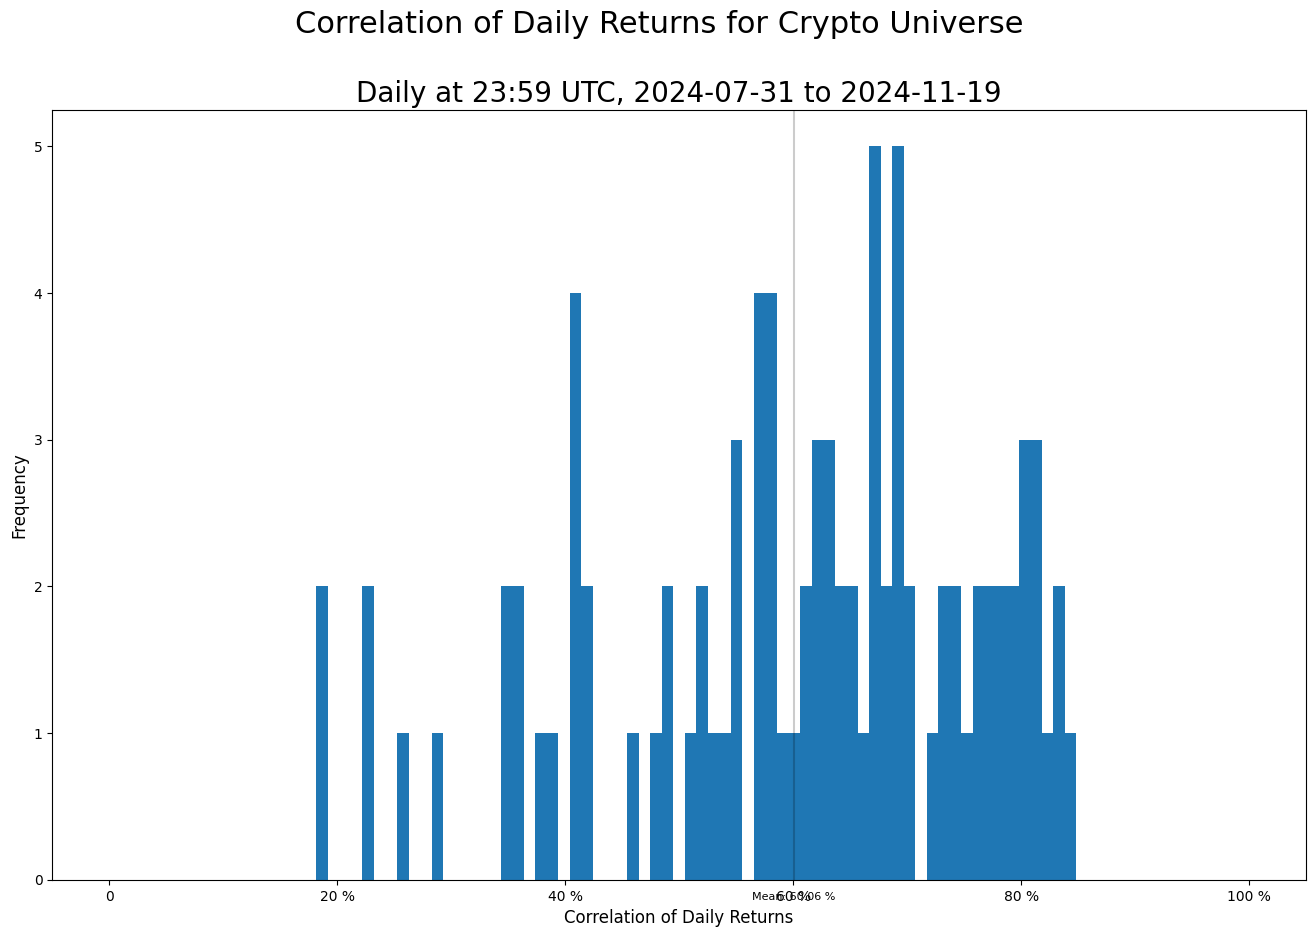

In [3]:
display(rho:=data.corr())
samples=pd.DataFrame({"row":[],"column":[],"correlation":[]}).set_index(["row","column"])

for i in range(rho.shape[0]):
    for j in range(i+1,rho.shape[0]):
        samples.loc[(rho.index[i],rho.columns[j]),"correlation"]=rho.iloc[i,j]*hundred

figure,plot=pl.subplots(figsize=(ten*GoldenRatio,ten))
counts,bins,patches=plot.hist(samples['correlation'],bins=np.linspace(zero,hundred,100))
plot.set_xlabel("Correlation of Daily Returns",fontsize=12)
plot.xaxis.set_major_formatter(PercentLabels(0))
plot.set_ylabel("Frequency",fontsize=12)
plot.yaxis.set_major_formatter(CountLabels(0))
plot.set_title(subtitle:="Daily at 23:59 UTC, %s to %s" % (data.index[0],data.index[-1]),fontsize=20)
plot.axvline(m:=samples['correlation'].mean(),color='black',alpha=0.2)
plot.text(m,zero,"\nMean: {:.2f} %".format(m),ha='center',va='top',fontsize=8)
figure.suptitle(title:="Correlation of Daily Returns for Crypto Universe",fontsize=22)
figure.savefig(title+'.png',dpi=300,bbox_inches='tight')

In [4]:
if 'random_seed' not in locals():
    random_seed=12345678 # don't reset the seed multiple times in one session

if random_seed is not None:
    generator=np.random.default_rng(seed=random_seed)
    nprint("Using NumPy random seed %d." % random_seed)
    random_seed=None

else:
    nprint("Continuing random sequence from prior seed.")

16:44:56 Using NumPy random seed 12345678.


In [5]:
results=pd.DataFrame({"Sample":range(1,(n:=1000)+1),"Assets":[np.nan]*n,"Portfolio":[np.nan]*n,"Coins":[""]*n}).set_index("Sample") # n is number of trials
nprint("Beginning analysis for {:,d} trials.".format(n))

for i in tqdm(results.index): # for each trial, pick a random sample of stocks with portfolio sizes uniformly distributed between 1 and maximum, one of 2^503-1 choices
    returns=pd.DataFrame()

    for ticker in data[generator.choice(data.columns,generator.integers(1,data.shape[1]+1),replace=False)]:
        returns[ticker]=data[ticker]
        returns=returns.copy() # 'cos it frags, apparently

    results.loc[i,"Coins"]=",".join(sorted(map(lambda x:x.split('-')[0],returns.columns))) # list of coins in portfolio
    returns['Portfolio']=returns.mean(axis=1) # equal weighted portfolio return
    select=returns["Portfolio"]>zero if filter=="Up" else returns["Portfolio"]<zero if filter=="Down" else ~returns["Portfolio"].isna()
    results.loc[i,"Assets"]=returns.shape[1]-1 # number of assets we ended up with
    results.loc[i,"Independent"]=returns.loc[select,[a for a in returns if a!="Portfolio"]].var().sum()/results.loc[i,"Assets"]**2 # if no correlation, portfolio variance is total variance divided by square of number of assets
    results.loc[i,"Portfolio"]=returns.loc[select,'Portfolio'].var() # variance of portfolio returns for same period as individual returns

results.dropna(inplace=True)
results["Effective D.o.F."]=results["Independent"]/results["Portfolio"]*results["Assets"]
display(results)
nprint("Done.")

16:44:56 Beginning analysis for 1,000 trials.


  0%|          | 0/1000 [00:00<?, ?it/s]

,Assets,Portfolio,Coins,Independent,Effective D.o.F.
Sample,,,,,
1,14.0,12.436906,"AAVE,AVAX,BCH,BTC,COMP,DOGE,ETC,ETH,LINK,LTC,S...",1.541176,1.734874
2,9.0,11.969545,"AAVE,AVAX,BTC,ETH,LINK,LTC,SHIB,UNI,XLM",2.354959,1.770713
3,8.0,13.036576,"COMP,DOGE,ETH,LTC,SHIB,UNI,XLM,XTZ",3.056594,1.875704
4,7.0,13.585462,"BCH,ETH,LINK,LTC,SHIB,UNI,XTZ",3.041313,1.567057
5,10.0,12.974353,"AAVE,AVAX,BCH,BTC,COMP,DOGE,ETH,SHIB,UNI,XLM",2.251391,1.735263
...,...,...,...,...,...
996,7.0,15.918490,"AAVE,AVAX,COMP,DOGE,LINK,SHIB,XTZ",3.658174,1.608646
997,12.0,12.608712,"AAVE,BCH,BTC,COMP,DOGE,ETC,ETH,LINK,LTC,SHIB,U...",1.720663,1.637595
998,8.0,12.010702,"BCH,BTC,ETC,LTC,SHIB,UNI,XLM,XTZ",2.677778,1.783595


16:45:15 Done.


In [6]:
from statsmodels.api import OLS,add_constant
Nmin,Nmax=five,results["Assets"].max()-one
design=results[select:=(results["Assets"]>=Nmin)&(results["Assets"]<=Nmax)][[yn:="Effective D.o.F.",xn:="Assets"]].drop_duplicates()
model=OLS(design[yn],add_constant(design[xn])).fit()
nprint(model.summary())
nprint("Implied regression factor count: {:.2f} +/- {:.2g} for data in [{:,.0f},{:,.0f}].".format(Kreg:=one/model.params.iloc[1],model.bse.iloc[1]/model.params.iloc[1]**4,Nmin,Nmax))
final=results[results[xn]==results[xn].max()].drop_duplicates(xn)
Nstar,Nact=tuple(final.iloc[-1][[yn,xn]])
rho=(Nact-Nstar)/((Nact-one)*Nstar)
nprint("Effective D.o.F. Limit {:,.2f}, Implied Correlation {:.2f} %.".format(Nstar,rho*hundred))
Khat=Nact/Nstar
nprint("Implied limiting factor count: {:.0f}.".format(Khat))

16:45:17                             OLS Regression Results                            
Dep. Variable:       Effective D.o.F.   R-squared:                       0.084
Model:                            OLS   Adj. R-squared:                  0.082
Method:                 Least Squares   F-statistic:                     53.32
Date:                Wed, 20 Nov 2024   Prob (F-statistic):           9.33e-13
Time:                        16:45:17   Log-Likelihood:                 366.58
No. Observations:                 585   AIC:                            -729.2
Df Residuals:                     583   BIC:                            -720.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.5326      0.019     79.778

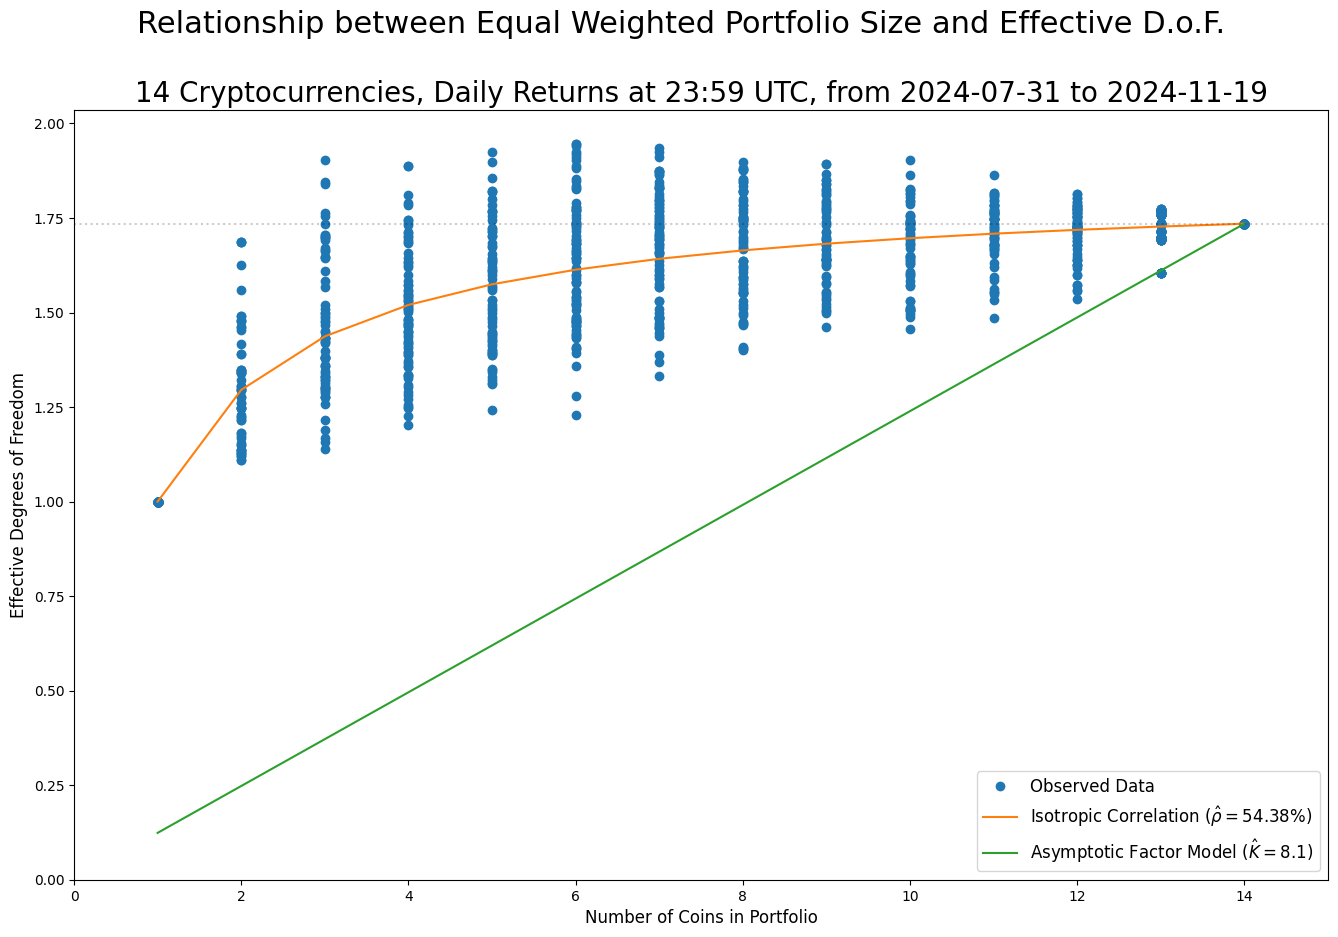

In [7]:
figure,plot=pl.subplots(figsize=(ten*GoldenRatio,ten))
plot.plot(x:=results["Assets"].to_numpy(),y:=results["Effective D.o.F."].to_numpy(),'o',label='Observed Data')
plot.plot(xp:=np.unique(np.sort(x)),xp/(one+(xp-one)*rho),'-',label='Isotropic Correlation ($\\hat{\\rho} = %.2f$%%)' % (rho*hundred))
plot.plot(xp,xp/Khat,'-',label="Asymptotic Factor Model ($\\hat{K} = %.1f$)" % Khat)
#plot.plot(xpp:=np.arange(Nmin,Nmax+one),model.params.iloc[0]+model.params.iloc[1]*xpp,'-',label="Regression Linear Model ($\\hat{K} = %.1f$)" % Kreg)
plot.set_xscale('log' if max(x)>100 else 'linear')
plot.set_ylim(zero,None)
plot.set_xlabel("Number of Coins in Portfolio",fontsize=12)
plot.set_ylabel("Effective Degrees of Freedom",fontsize=12)
figure.suptitle(title:="Relationship between Equal Weighted Portfolio Size and Effective D.o.F.",fontsize=22)
plot.set_title(subtitle:="%d Cryptocurrencies, Daily Returns at 23:59 UTC, from %s to %s" % (data.shape[1],data.index[0],data.index[-1]),fontsize=20)
plot.set_xlim(zero,Nmax+two)
plot.legend(fontsize=12)
plot.axhline(Nstar,color='black',linestyle=':',alpha=0.2)
plot.xaxis.set_major_formatter(CountLabels())
figure.savefig(title+".png",dpi=300,bbox_inches='tight')

16:45:22 Isotropic Model: Total Chi Squared 11.413 for 12 d.o.f., p Value = 0.493893.
16:45:22 Factor Model: Total Chi Squared 21.4555 for 9 d.o.f., p Value = 0.0107744.


Mean   St.Dev. Sample  Std.Err. Isotropic                      \
                                                Model     Error   Z Score   
Assets                                                                      
1.0     1.000000  0.000000     73  0.000000  1.000000  0.000000       NaN   
2.0     1.302977  0.153695     61  0.019679  1.295482  0.007495  0.380882   
3.0     1.460258  0.180955     72  0.021326  1.437020  0.023238  1.089677   
4.0     1.508570  0.161152     81  0.017906  1.520057 -0.011486 -0.641485   
5.0     1.564877  0.165632     72  0.019520  1.574651 -0.009774 -0.500706   
6.0     1.631310  0.165323     89  0.017524  1.613279  0.018031  1.028940   
7.0     1.676200  0.145750     83  0.015998  1.642051  0.034149  2.134564   
8.0     1.668903  0.138027     70  0.016497  1.664313  0.004590  0.278226   
9.0     1.687991  0.114689     59  0.014931  1.682050  0.005941  0.397890   
10.0    1.676095  0.107040     63  0.013486  1.696513 -0.020418 -1.514075   
11.0    1.713094  0.079372     63  0.010000  1.708534  0.004561  0.456059   
12.0    1.712562  0.067108     73  0.007854  1.718682 -0.006120 -0.779144   
13.0    1.723637  0.049137     80  0.005494  1.727363 -0.003726 -0.678280   

                    Factor                                
         Chi Sq.     Model     Error   Z Score   Chi Sq.  
Assets                                                    
1.0          NaN       NaN       NaN       NaN       NaN  
2.0     0.145071       NaN       NaN       NaN       NaN  
3.0     1.187395       NaN       NaN       NaN       NaN  
4.0     0.411503       NaN       NaN       NaN       NaN  
5.0     0.250706  1.611703 -0.046827 -2.398911  5.754774  
6.0     1.058717  1.627529  0.003781  0.215758  0.046551  
7.0     4.556365  1.643354  0.032846  2.053086  4.215163  
8.0     0.077410  1.659180  0.009723  0.589360  0.347345  
9.0     0.158317  1.675006  0.012985  0.869652  0.756295  
10.0    2.292423  1.690831 -0.014736 -1.092722  1.194040  
11.0    0.207990  1.706657  0.006438  0.643769  0.414439  
12.0    0.607066  1.722482 -0.009920 -1.263026  1.595236  
13.0    0.460063  1.738308 -0.014671 -2.670519  7.131670

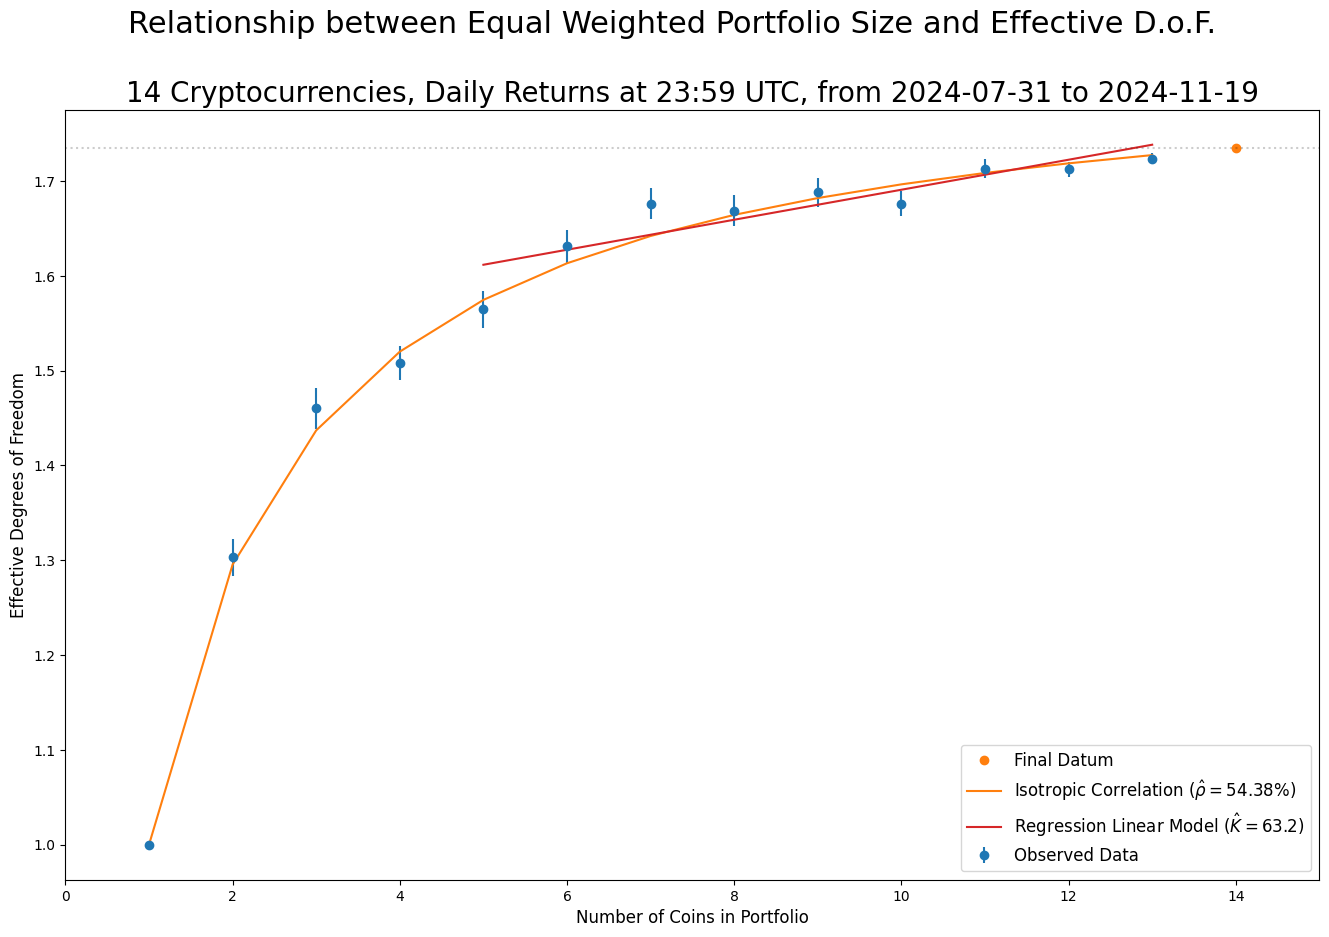

In [8]:
from scipy.stats import chi2,f as fdensity
meta=pd.DataFrame()
meta["Mean"]=(g:=results[(results["Assets"]<=Nmax)][["Assets","Effective D.o.F."]].groupby("Assets")).mean()
meta["St.Dev."]=g.std()
meta["Sample"]=g.count()
meta["Std.Err."]=meta["St.Dev."]/meta["Sample"]**0.5
meta[(l:="Isotropic","Model")]=(x:=meta.index)/(one+(x-one)*rho)
meta[(l,"Error")]=meta["Mean"]-meta[(l,"Model")]
meta[(l,"Z Score")]=meta[(l,"Error")]/meta["Std.Err."]
meta[(l,"Chi Sq.")]=meta[(l,"Z Score")]**2
nprint("%s Model: Total Chi Squared %g for %d d.o.f., p Value = %g." % (l,sc21:=meta[(l,"Chi Sq.")].sum(),df1:=meta[(l,'Chi Sq.')].count(),chi2(df1).sf(sc21)))
meta[(l:="Factor","Model")]=list(map(lambda x:model.params.iloc[0]+model.params.iloc[1]*x if x>=Nmin and x<=Nmax else np.nan,meta.index))
meta[(l,"Error")]=meta["Mean"]-meta[(l,"Model")]
meta[(l,"Z Score")]=meta[(l,"Error")]/meta["Std.Err."]
meta[(l,"Chi Sq.")]=meta[(l,"Z Score")]**2
nprint("%s Model: Total Chi Squared %g for %d d.o.f., p Value = %g." % (l,sc22:=meta[(l,"Chi Sq.")].sum(),df2:=meta[(l,'Chi Sq.')].count(),chi2(df2).sf(sc22)))
meta.columns=pd.MultiIndex.from_tuples(list(map(lambda x:x if type(x)==tuple else (x,''),meta.columns)))
display(meta)

figure,plot=pl.subplots(figsize=(ten*GoldenRatio,ten))
plot.errorbar(x=meta.index,y=meta["Mean"],yerr=meta["Std.Err."],fmt='o',label='Observed Data')
plot.plot([Nact],[Nstar],'o',label='Final Datum',color='C1')
plot.plot(x,z:=meta[("Isotropic","Model")],'-',label='Isotropic Correlation ($\\hat{\\rho} = %.2f$%%)' % (rho*hundred),color='C1')
plot.plot(xp:=np.arange(Nmin,Nmax+one),model.params.iloc[0]+model.params.iloc[1]*xp,'-',label="Regression Linear Model ($\\hat{K} = %.1f$)" % Kreg,color='C3')
plot.set_xscale('log' if max(x)>100 else 'linear')
plot.set_xlabel("Number of Coins in Portfolio",fontsize=12)
plot.set_ylabel("Effective Degrees of Freedom",fontsize=12)
figure.suptitle(title,fontsize=22)
plot.set_title(subtitle,fontsize=20)
plot.set_xlim(zero,Nmax+two)
plot.legend(fontsize=12)
plot.axhline(Nstar,color='black',linestyle=':',alpha=0.2)
plot.xaxis.set_major_formatter(CountLabels())
figure.savefig(title+" 2.png",dpi=300,bbox_inches='tight')

In [72]:
from datetime import timedelta
history,returns=download(list(data)).xs('Adj Close',axis=1,level=0),pd.DataFrame()

for c in history:
    if history[c].last_valid_index()!=history.last_valid_index(): # get rid of tickers that have gone stale (this is COIN as returned by Yahoo)
        history.drop(columns=c,inplace=True)

    else:
        returns[c]=history[c].pct_change(fill_method=None)*hundred
        returns.loc[(f:=returns[c].first_valid_index()):(f+timedelta(days=365)),c]=np.nan # set first year of data to NA to avoid launch spikes

returns.index=pd.DatetimeIndex(returns.index).to_period('D')
returns.dropna(inplace=True,how='all')
returns.drop(returns.index[-1],inplace=True) # remove the final row in case it is not complete
returns=returns[[c for c in returns if c not in (vetoes:=['SHIB-USD','UNI-USD'])]].copy() # dropping SHIB (very low values, precision issue) and UNI (step change in 2022 by orders of magnitude)
nprint("Removed %s entirely!" % ", ".join(vetoes))
returns=returns.copy()
returns['Count']=returns.count(axis=1)
returns=returns[returns['Count']>=five]
returns["Portfolio"]=returns.mean(axis=1)
returns["Year"]=returns.index.year
display(returns)

[*********************100%***********************]  14 of 14 completed


17:33:08 Removed SHIB-USD, UNI-USD entirely!


<ipython-input-72-113d73251a5b>:12: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  returns.index=pd.DatetimeIndex(returns.index).to_period('D')


,AAVE-USD,AVAX-USD,BCH-USD,BTC-USD,DOGE-USD,ETC-USD,ETH-USD,LINK-USD,LTC-USD,XLM-USD,XTZ-USD,Count,Portfolio,Year
Date,,,,,,,,,,,,,,
2018-11-11,NaN,NaN,-4.161377,0.031982,-3.744292,-2.096713,-0.561329,-2.208038,-1.978748,4.737204,0.642718,9,-0.033859,2018
2018-11-12,NaN,NaN,-3.193828,-0.623901,-3.099306,-0.742514,-0.436262,10.431562,-1.395306,-2.294911,-3.804309,9,0.384122,2018
2018-11-13,NaN,NaN,-0.754790,-0.184889,-3.883811,-1.225531,-1.707076,3.312554,-1.878841,-3.568305,-1.776871,9,-0.266756,2018
2018-11-14,NaN,NaN,-14.266303,-9.767137,-8.488966,-12.485053,-12.294876,-5.778568,-12.245908,-9.598618,-10.177453,9,-8.610288,2018
2018-11-15,NaN,NaN,-4.094623,-1.573977,3.896099,-2.833865,-0.325807,-1.133531,0.773886,3.819467,-0.530559,9,0.699709,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-11-15,4.050010,6.371968,4.488718,4.373134,4.850881,5.792740,1.441404,6.776549,1.990307,11.766007,5.264172,11,5.680491,2024
2024-11-16,2.704458,5.938763,6.660125,-0.557322,-4.072112,15.981574,0.974315,4.882438,13.885232,49.490965,16.775225,11,10.305305,2024
2024-11-17,-3.984963,-1.072503,-6.495277,-0.786922,0.773062,-3.344274,-1.838725,-5.148777,-8.670605,-10.165062,-9.178402,11,-3.242704,2024


In [89]:
results=pd.DataFrame({"Sample":range(1,(n:=5000)+1),"Assets":[np.nan]*n,"Portfolio":[np.nan]*n,"Coins":[""]*n,"Period":[np.nan]*n}).set_index("Sample") # n is number of trials
nprint("Beginning analysis for {:,d} trials.".format(n))

for i in tqdm(results.index): # for each trial, pick a random sample of stocks with portfolio sizes uniformly distributed between 1 and maximum, one of 2^Nmax-1 choices
    period=generator.choice(returns[p:="Year"].unique(),1)[0]
    subset=returns[returns[p]==period][generator.choice(a:=[c for c in returns.columns if '-' in c],generator.integers(1,len(a)+1),replace=False)].copy()
    subset.dropna(inplace=True)
    results.loc[i,"Coins"]=",".join(sorted(map(lambda x:x.split('-')[0],subset.columns))) # list of coins in portfolio
    subset['Portfolio']=subset.mean(axis=1) # equal weighted portfolio return
    results.loc[i,"Assets"]=subset.shape[1]-1 # number of assets we ended up with
    results.loc[i,"Independent"]=subset[[c for c in subset if '-' in c]].var().sum()/results.loc[i,"Assets"]**2 # if no correlation, portfolio variance is total variance divided by square of number of assets
    results.loc[i,"Portfolio"]=subset['Portfolio'].var() # variance of portfolio returns for same period as individual returns
    results.loc[i,"Period"]=period

results.dropna(inplace=True)
results.drop_duplicates(inplace=True)
results["Effective D.o.F."]=results["Independent"]/results["Portfolio"]*results["Assets"]
display(results)
nprint("Done.")

17:53:44 Beginning analysis for 5,000 trials.


  0%|          | 0/5000 [00:00<?, ?it/s]

,Assets,Portfolio,Coins,Period,Independent,Effective D.o.F.
Sample,,,,,,
1,10.0,12.134009,"AAVE,AVAX,BCH,BTC,DOGE,ETC,LINK,LTC,XLM,XTZ",2024.0,2.004301,1.651804
2,11.0,7.304452,"AAVE,AVAX,BCH,BTC,DOGE,ETC,ETH,LINK,LTC,XLM,XTZ",2023.0,1.168376,1.759493
3,8.0,7.345867,"AVAX,BCH,BTC,ETH,LINK,LTC,XLM,XTZ",2023.0,1.633729,1.779209
4,6.0,19.725594,"AVAX,DOGE,ETC,ETH,LINK,XLM",2021.0,5.281688,1.606549
5,1.0,11.061469,BTC,2022.0,11.061469,1.000000
...,...,...,...,...,...,...
4993,3.0,51.528577,"BCH,DOGE,LINK",2018.0,25.607344,1.490863
4994,7.0,12.040817,"AAVE,BCH,BTC,ETC,ETH,LINK,XTZ",2024.0,2.608852,1.516672
4996,9.0,20.053741,"AAVE,AVAX,BCH,DOGE,ETC,ETH,LINK,LTC,XLM",2022.0,3.008001,1.349973


17:54:21 Done.


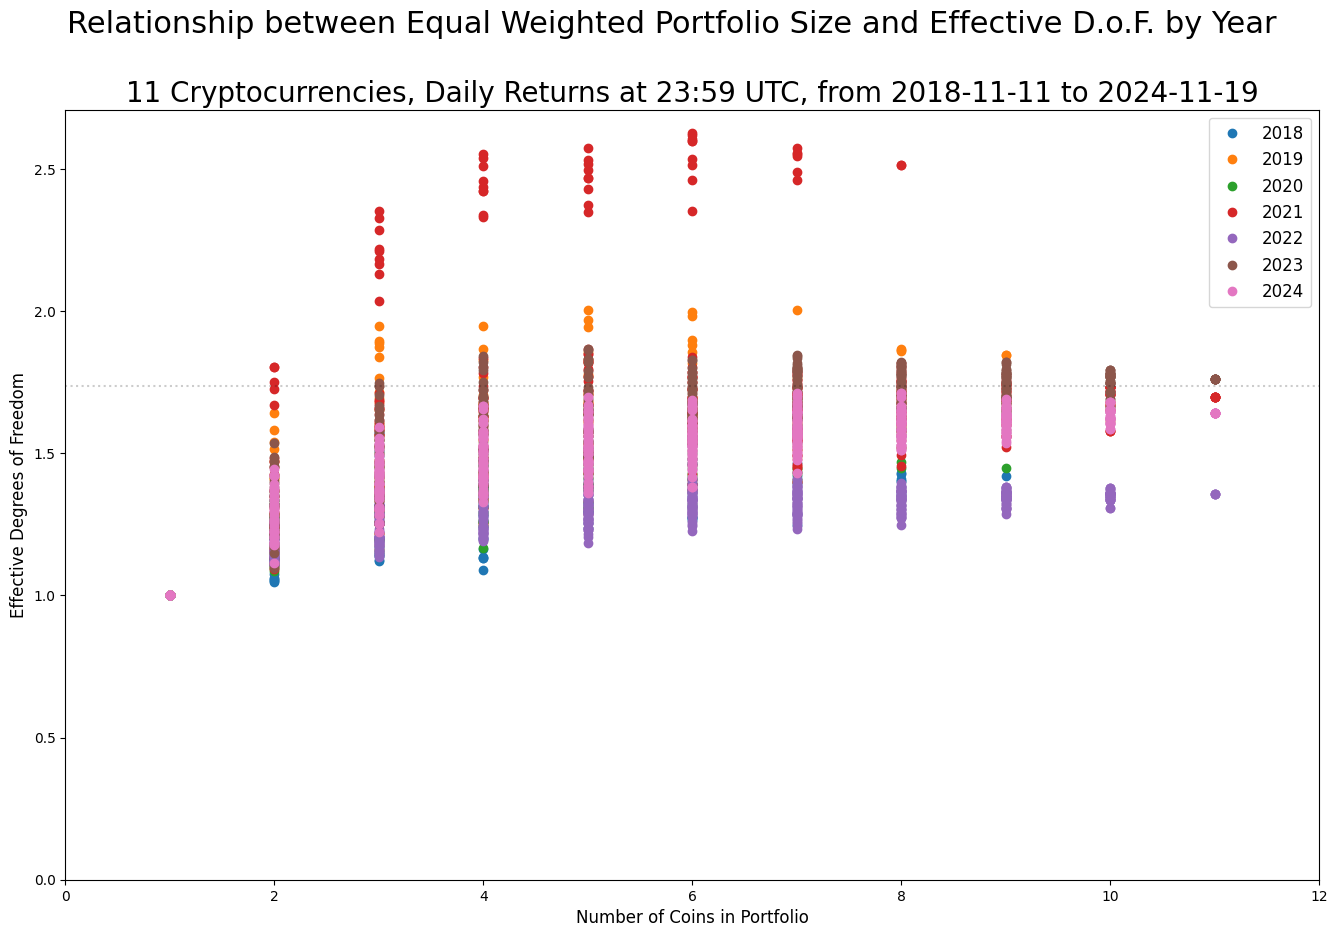

In [105]:
figure,plot=pl.subplots(figsize=(ten*GoldenRatio,ten))
Nmax=results["Assets"].max()-one

for period in sorted(results["Period"].unique()):
    plot.plot(x:=results[select:=results["Period"]==period]["Assets"].to_numpy(),y:=results[select]["Effective D.o.F."].to_numpy(),'o',label=int(period))

plot.set_xscale('log' if max(x)>100 else 'linear')
plot.set_ylim(zero,None)
plot.set_xlabel("Number of Coins in Portfolio",fontsize=12)
plot.set_ylabel("Effective Degrees of Freedom",fontsize=12)
figure.suptitle(title:="Relationship between Equal Weighted Portfolio Size and Effective D.o.F. by Year",fontsize=22)
plot.set_title(subtitle:="%d Cryptocurrencies, Daily Returns at 23:59 UTC, from %s to %s" % (len(a),returns.index[0],returns.index[-1]),fontsize=20)
plot.set_xlim(zero,Nmax+two)
plot.legend(fontsize=12)
plot.axhline(Nstar,color='black',linestyle=':',alpha=0.2)
plot.xaxis.set_major_formatter(CountLabels())
figure.savefig(title+".png",dpi=300,bbox_inches='tight')

,AAVE-USD,AVAX-USD,BCH-USD,BTC-USD,DOGE-USD,ETC-USD,ETH-USD,LINK-USD,LTC-USD,XLM-USD,XTZ-USD,Portfolio,Assets,Independent,Effective D.o.F.,Imputed Correlation
Year,,,,,,,,,,,,,,,,
2018,NaN,NaN,138.100860,25.599532,22.740650,50.768403,48.368609,69.624589,39.790087,41.815496,50.243165,3.090868,10,4.870514,1.575776,59.400905
2019,NaN,NaN,28.684996,12.690500,11.798156,19.125543,16.915673,48.141735,23.726669,18.438624,33.475413,1.038724,10,2.129973,2.050567,43.074443
2020,NaN,NaN,29.951167,14.219099,28.864247,27.412591,24.391541,44.235523,26.028220,37.074306,35.577777,1.664904,10,2.677545,1.608228,57.978037
2021,26.338886,64.152351,48.766624,17.715785,486.126192,65.957318,31.357507,53.562107,37.260494,54.787837,60.438949,2.650690,12,6.572667,2.479606,34.904354
2022,40.176555,32.575116,19.110765,11.061469,31.665288,36.796413,20.448674,26.495531,20.252314,16.127458,23.118447,1.303045,12,1.929361,1.480656,64.586499
2023,14.929209,19.360389,17.632938,5.247752,10.643087,11.242495,5.976481,14.988606,11.610572,18.608535,11.133410,0.511481,12,0.981760,1.919447,47.743635
2024,23.471724,22.161098,29.017557,8.128530,30.057239,16.766151,11.455667,17.016565,13.011703,18.821928,21.977562,0.821554,12,1.471429,1.791031,51.818651


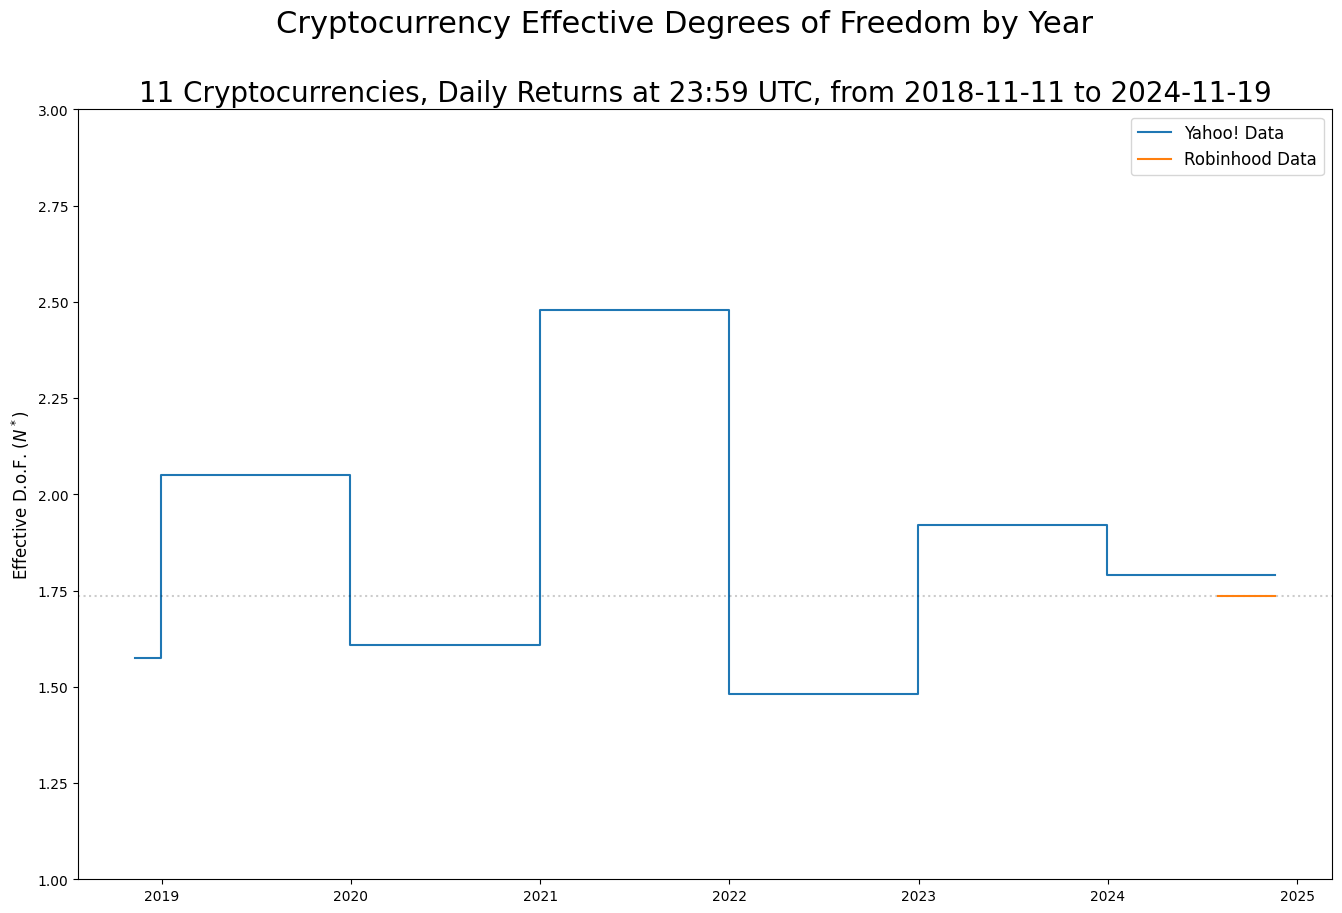

In [164]:
variances=returns[[c for c in returns if '-' in c or c in ('Portfolio','Year')]].groupby('Year').var()
variances["Assets"]=variances.count(axis=1)
variances["Independent"]=variances[[c for c in variances if '-' in c]].sum(axis=1)/variances["Assets"]**2
variances["Portfolio"]=variances["Portfolio"]/variances[na:="Assets"]
variances[ns:="Effective D.o.F."]=variances["Independent"]/variances["Portfolio"]
variances[nr:="Imputed Correlation"]=(variances[na]-variances[ns])/((variances[na]-one)*variances[ns])*hundred
display(variances)

figure,plot=pl.subplots(figsize=(ten*GoldenRatio,ten))
plot.step(x:=list(map(lambda x:pd.to_datetime(str(x)),[returns.index[0]]+list(map(lambda x:pd.Period(datetime(x,12,31),'D') if x<data.index[-1].year else data.index[-1],variances.index)))),
          y:=np.insert(variances[ns].to_numpy(),0,variances[ns].iloc[0]),'-',where='pre',label='Yahoo! Data') # the code to make x here is heinous, and that is due to Pandas
plot.set_ylabel("Effective D.o.F. ($N^*$)",fontsize=12)
plot.set_ylim(one,three)
plot.axhline(Nstar,color='black',linestyle=':',alpha=0.2)
plot.plot(x:=data.index[[0,-1]],y:=[Nstar]*len(x),'-',color='C1',label='Robinhood Data')
plot.legend(fontsize=12)
figure.suptitle(title:="Cryptocurrency Effective Degrees of Freedom by Year",fontsize=22)
plot.set_title(subtitle,fontsize=20)
figure.savefig(title+'.png',dpi=300,bbox_inches='tight')